<a href="https://colab.research.google.com/github/jgarnicaa/FakeNews/blob/main/FakeNewsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1Md0grlXXV4fB0bkYuMWzBiS64RvjaFGX" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento del Negocio y Carga de Datos**
---

Este notebook es una plantilla que le puede servir como guía para el primer entregable del proyecto aplicado.

Presentado por:

*   Jose Eduardo Garnica Aza
* Samuel Moreno Vahos

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:

### **CLASIFICADOR DE FAKENEWS**

Herramienta desarrolla para clasificar si una noticia encontrada en la web es falsa o es real.

### **1.1. Trasfondo del Negocio**
---

- ¿Quién es el cliente o los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
- ¿Qué problemas del negocio o del dominio estamos tratando de solucionar?

El desarrollo de un clasificador de noticias falsas es sumamente relevante en el contexto actual, ya que la mayoría de la información se consume a través de medios digitales, como redes sociales (Twitter, Facebook, entre otras) y portales de noticias. La creciente masificación de estas plataformas ha facilitado la difusión de noticias falsas por parte de personas con intenciones maliciosas. Este proyecto cobra importancia al ofrecer una herramienta que puede impactar positivamente en la vida cotidiana de las personas, brindando mayor seguridad informativa tanto al público en general como en áreas específicas como la política, la salud, el marketing, entre otros.

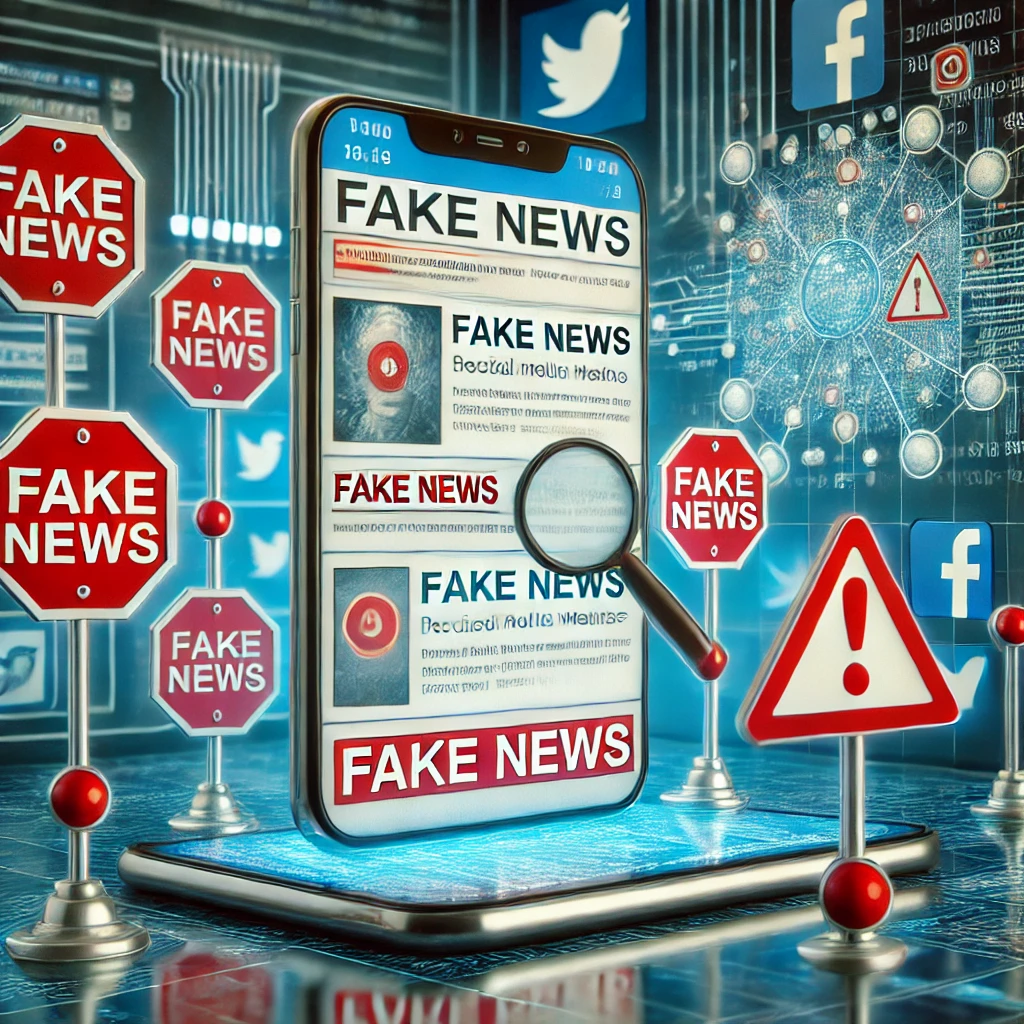

* Imagen generada con IA


### **1.2. Alcance**
---

- ¿Qué  solución basada en _Deep Learning_ queremos implementar?
- ¿Qué  se hará?
- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

En este caso, debido al tipo de clasificación requerida, se propone utilizar una arquitectura basada en **BERT**, realizando un proceso de fine-tuning para ajustarlo a nuestra aplicación específica. El proceso general consistirá en la obtención de los textos, seguido por su tratamiento mediante técnicas de procesamiento de lenguaje, como el uso de embeddings (Word2Vec, FastText, etc.) o el auto-tokenizador propio del modelo. Posteriormente, se entrenará el modelo y se evaluará su desempeño. Inicialmente, se plantea que el producto permita la clasificación de noticias mediante la carga de un archivo de texto en formato .txt para su análisis y clasificación.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto.

Se hace un diagrama en Trello que permita seguir y modificar las tareas pendiente: https://trello.com/b/2orWf6yM/proyecto-fake-news/timeline



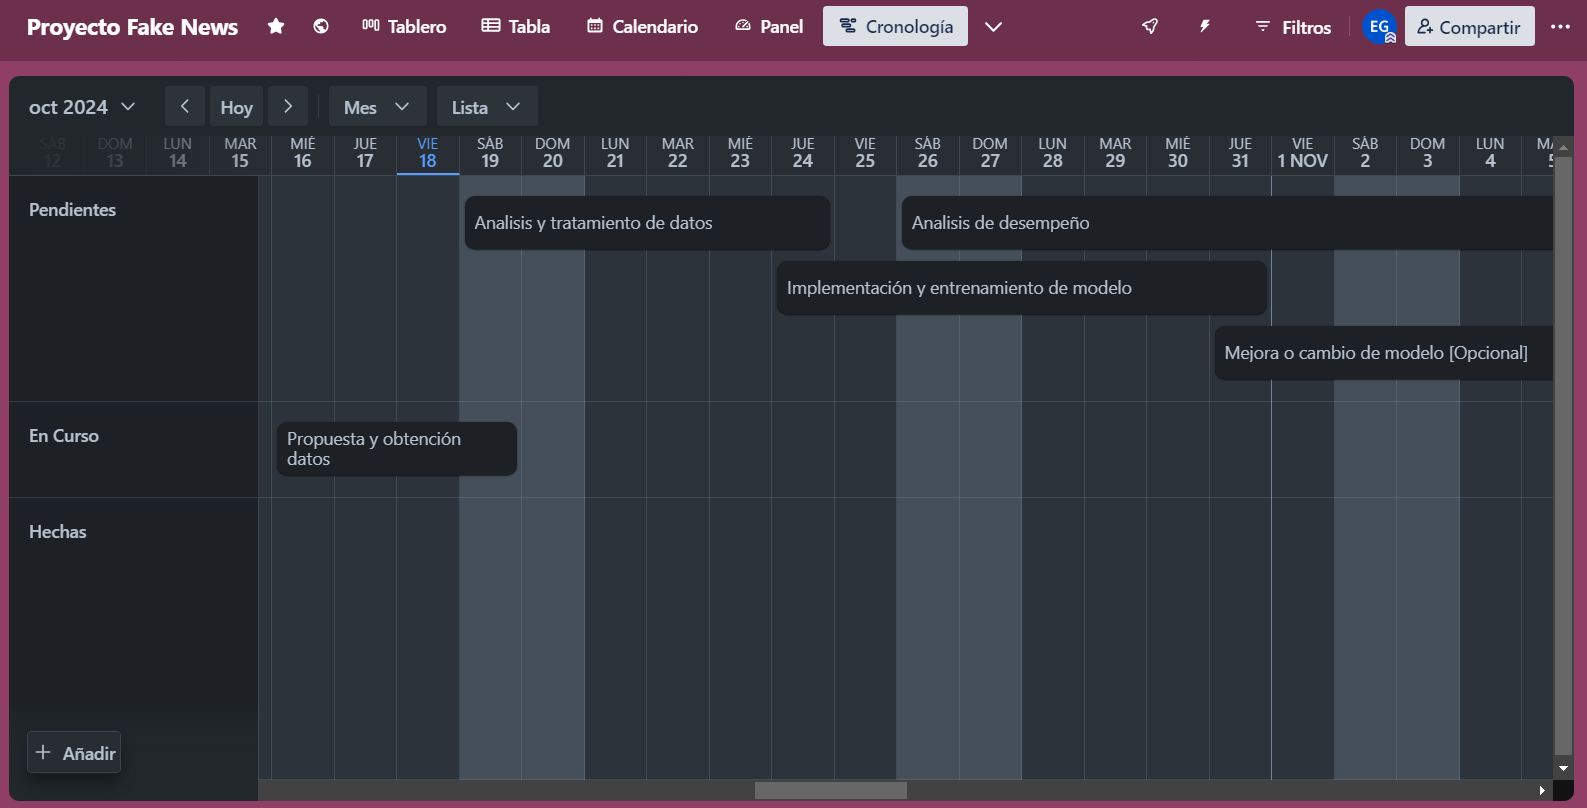


## **2. Datos**
---

En esta sección debe adjuntar una descripción de los datos y agregar el código que permite su tratamiento.

### **2.1. Origen**
---

- ¿De dónde vienen los datos?
- ¿Se usa alguna herramienta o proceso para la descarga de la información?
- ¿Qué tipo de datos estamos manejando?

Los datos tomados vienen de un dataset de kaggle que contiene aproximadamente 40000 datos repartidos en dos archivos .csv uno para fake news y otro para noticias reales. Se pueden consultar los datos directamente aqui, se ven 5 columnas, uno con las etiquetas de cada texto, el titulo y el contenido de la noticia, la fecha de publicacion y su el tema de la noticia.

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

### **2.2. Carga o Adquisición de Datos**
---

Agregue el código necesario en _Python_ para obtener o cargar los datos.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [ ]:
pd_true = pd.read_csv("True.csv")
pd_true["label"] = "real"
pd_fake = pd.read_csv("Fake.csv")
pd_fake["label"] = "fake"

In [ ]:
df = pd.concat([pd_true, pd_fake], ignore_index=True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


## **3. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **3.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto?

In [ ]:
num_documents = df.shape[0]
print(f"El corpus tiene {num_documents} documentos.")

El corpus tiene 44898 documentos.


In [ ]:
memory_usage_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"El corpus tiene un tamaño aproximado de {memory_usage_mb:.2f} MB.")

El corpus tiene un tamaño aproximado de 180.75 MB.


### **3.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?
- ¿Existen documentos ilegibles o con problemas de codificación?
- ¿Hay mezcla de formatos en el conjunto?

Con una descripción general sobre las columnas de la tabla se logra identificar que hay **`documentos repetidos`**. Además, se ve que hay observaciones con **`textos vacíos`**.

In [ ]:
df.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [ ]:
empty_docs = df["text"].apply(lambda x: re.fullmatch(r'\s*', x) is not None).sum()
print(f"Hay {empty_docs} documentos vacíos en el corpus.")

Hay 631 documentos vacíos en el corpus.


In [ ]:
df = df[df["text"].apply(lambda x: re.fullmatch(r'\s*', x) is None)]

Todas las observaciones se componen por cadenas de caracteres. A continuación, se muestran dos ejemplos de textos pertenecientes al conjunto de datos del estudio.

In [ ]:
df["text"].sample(2, random_state=42).tolist()

['SYDNEY (Reuters) - Ukrainian Justice Minister Pavlo Petrenko said on Thursday he was open to amending law reforms amid concerns they aided corruption and could lead to the end of probes into the shooting of protesters in the run-up up to the 2014 revolution. The eastern European nation, which is in a dispute with Russia over its annexation of Crimea, passed amendments to the Criminal Procedure Code last week that anti-corruption groups say severely limits the time investigators have to solve a crime and present a case in court.  Petrenko said he had yet to go through the final text of the lengthy reforms, but he said that he was aware of the concerns.  If there (are) some positions which make problems for the investigations process for old cases or for new cases I will give proposals to the parliament and president to change these positions,  Petrenko told Reuters in an interview in Sydney, where he was attending a legal industry conference. The legislation still requires the sign-of

### **3.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar? De ser así, ¿es una variable continua o categórica?
- Analice la distribución de las etiquetas. Identifique si hay desbalanceo de datos.
- ¿El conjunto de datos cuenta con otras variables adicionales? De ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

Con este proyecto se busca clasificar textos de noticias entre dos categorías ("real" y "fake"). Las etiquetas de esta variable corresponden a la columna **`label`**.

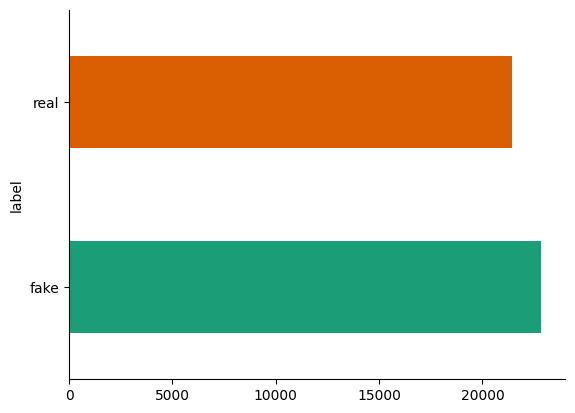

In [ ]:
df.groupby("label").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))
plt.gca().spines[["top", "right",]].set_visible(False)

Se puede ver finalmente la distribución de las etiquetas así como su cantidad. También se evidencia que el conjunto de datos está balanceado.

## **4. Limpieza de los Datos**
---

La selección de las técnicas de preprocesamiento puede variar en cada conjunto de datos. Recuerde que puede aplicar (no necesariamente todas) las técnicas generales vistas en el curso, dependiendo si está trabajando con imagenes, datos estructurados, textos, etc.

In [ ]:
# ---INGRESE SU CÓDIGO---

## **Créditos**

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*